In [31]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
# loading of dataset
financial_df=pd.read_csv(r'C:\Users\91901\Desktop\internship 1\project 4\Financial Analytics data.csv')

In [33]:
financial_df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [34]:
financial_df.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75
487,500,L T Foods,NaN,NaN


In [35]:
financial_df.shape


(488, 4)

In [36]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [37]:
financial_df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [38]:
financial_df.isnull().sum()>0
# Drop rows with any null values
financial_df_cleaned = financial_df.dropna()

# Check the shape of the DataFrame before and after to see how many rows were dropped
print("Before dropping null values:", financial_df.shape)
print("After dropping null values:", financial_df_cleaned.shape)


Before dropping null values: (488, 4)
After dropping null values: (459, 4)


In [39]:
financial_df_dup=financial_df.duplicated().any()
print(financial_df_dup)

False


In [40]:
# summary statistics of the dataset
financial_df.describe() 

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,479.000000,459.000000
mean,251.508197,28043.857119,3807.789412
std,145.884078,59464.615831,9989.449987
min,1.000000,3017.070000,0.000000
25%,122.750000,4843.575000,534.910000
50%,252.500000,9885.050000,1137.170000
75%,378.250000,23549.900000,2730.195000
max,500.000000,583436.720000,110666.930000


In [42]:
# Select the columns of interest
selected_columns = financial_df[['Mar Cap - Crore', 'Sales Qtr - Crore']]
# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                    Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.624409
Sales Qtr - Crore         0.624409           1.000000


<Axes: >

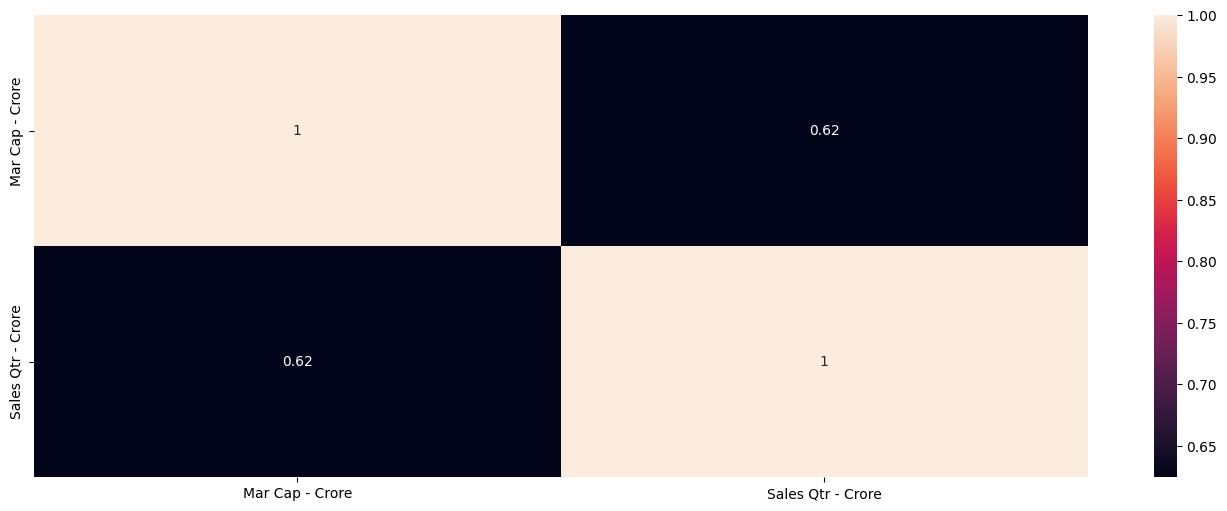

In [ ]:
# heat map of correlation matrix
plt.figure(figsize=(17,6))
sns.heatmap(correlation_matrix,annot=True)

In [ ]:
financial_df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

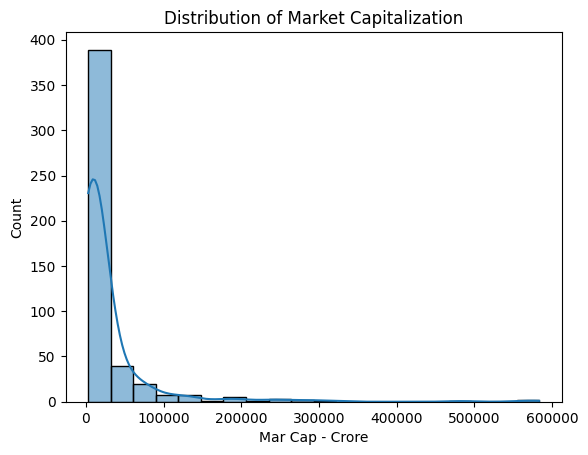

In [ ]:
sns.histplot(x='Mar Cap - Crore',data=financial_df,bins=20,kde=True)
plt.title('Distribution of Market Capitalization')
plt.show()

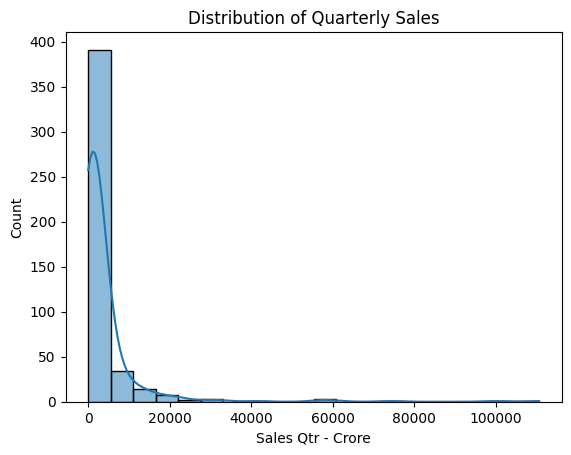

In [ ]:
sns.histplot(x='Sales Qtr - Crore',data=financial_df,bins=20,kde=True)
plt.title('Distribution of Quarterly Sales')
plt.show()

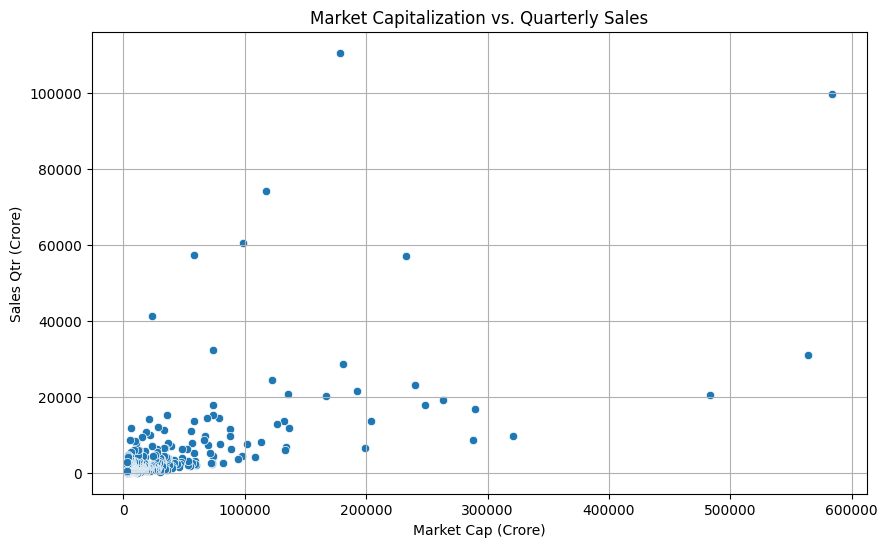

In [ ]:
# Create Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=financial_df)
plt.title('Market Capitalization vs. Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Sales Qtr (Crore)')
plt.grid(True)
plt.show()



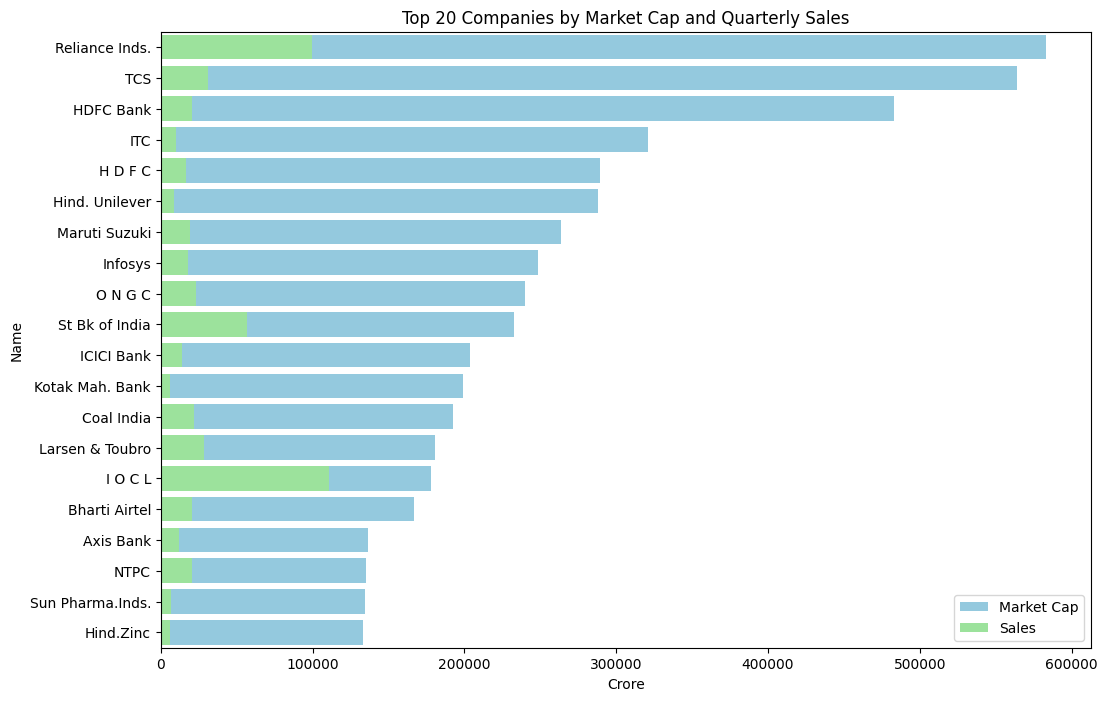

In [ ]:
# Select top 10 companies by market capitalization
top_20_market_cap = financial_df.nlargest(20, 'Mar Cap - Crore')

# Create Bar Plot for the top 10 companies
plt.figure(figsize=(12, 8))
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_20_market_cap, color='skyblue', label='Market Cap')
sns.barplot(x='Sales Qtr - Crore', y='Name', data=top_20_market_cap, color='lightgreen', label='Sales')
plt.title('Top 20 Companies by Market Cap and Quarterly Sales')
plt.xlabel('Crore')
plt.legend()
plt.show()